<a href="https://colab.research.google.com/github/FelipePinheiro964/PUCRS---Fase-2---Steam-Games/blob/main/PUCRS_Fase_2_Steam_games.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*TRABALHO DE PROGRAMAÇÃO PARA DADOS*

---

> _NOME:_ Felipe Pinheiro Fossá

> _CURSO:_ Programação para dados





# Imports e instalação

Instação de bibliotecas:

*   executar apenas se necessário


In [1]:
!pip install pandas matplotlib numpy seaborn

Importações Importantes para o Código:

*   `import sys` - Uso para finalizar o programa quando necessário.
*   `import pandas` as pd - Leitura e impressão de tabelas, usado para todas as questões.
*   `import matplotlib.pyplot as plt` - Usado para gráficos mostrados ao final do arquivo.
*   `import numpy as np` - Utilizado dentro do Pandas.
*   `from matplotlib import font_manager` - Usado para testar novas fontes para os gráficos do Matplotlib.
*   `import seaborn as sns` - Assim como o anterior, usado para customizar gráficos.

In [2]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import font_manager
import matplotlib.font_manager as fm
import seaborn as sns

# Leitura e validação de arquivo csv (Definir o arquivo desejado, escreva o seu nome. )

> Ex: `"steam_games.csv"`



---



Execução da leitura de arquivo com o pandas:

1.   Escolha do arquivo
2.   Validação dos dados no arquivo



In [3]:
# Seleção de arquivo
f = input('Digite o nome do arquivo: ')

# Finalização forçada
if str.lower(f) == 'sair':

  print('Saindo...')
  sys.exit('O sistema foi finalizado pelo usuario, inicie novamente para outro uso.') # Utilizando o import sys

else:
  try:

    tabela = pd.read_csv(f, sep=",")
    print('Arquivo selecionado com sucesso!')
    if tabela.empty:
      print('Arquivo vazio.') # Garantir que o arquivo possui dados

  except FileNotFoundError:
    print('Digite um nome válido')

Digite o nome do arquivo: steam_games.csv
Arquivo selecionado com sucesso!


# Questão 1

Para esta questão, temos:

*   Os dez jogos mais bem avaliados pelo metacrit;
*   Ordenar por onde de lançamentos (caso notas se repetirem).



In [4]:
try:
  metacritic = tabela[['Name', 'Metacritic score', 'Release date']]

  if metacritic['Metacritic score'].duplicated().any():
     print('Os dez jogos melhor avaliados dentro do arquivo!')
     metacritic_order = metacritic.sort_values(by= ['Metacritic score',
                                                    'Release date'],
                                               ascending=[True, True] # Mostra os 10 maiores
                                               )
     display(metacritic_order.tail(n=10))# Seleciona os 10 primeiros

  else:
    # Caso o arquivo não apresente notas repetidas
    print('Os dez jogos melhor avaliados dentro do arquivo!')
    metacritic_10 = metacritic.copy()
    top_10_notas = metacritic_10.nlargest(10, 'Metacritic score').sort_values(by='Metacritic score', ascending=False)
    display(top_10_notas.tail(n=10))

except FileNotFoundError:
  print('Escolha um arquivo válido') # Falha da leitura do arquivo

Os dez jogos melhor avaliados dentro do arquivo!


,Name,Metacritic score,Release date
55150,Sid Meier's Civilization® IV,94,"Oct 25, 2006"
36598,Divinity: Original Sin - Enhanced Edition,94,"Oct 27, 2015"
28170,Portal 2,95,"Apr 18, 2011"
28484,Portal 2,95,"Apr 18, 2011"
57205,Grand Theft Auto V,96,"Apr 13, 2015"
32406,BioShock™,96,"Aug 21, 2007"
36775,Half-Life 2,96,"Nov 16, 2004"
49557,Half-Life,96,"Nov 8, 1998"
45752,Disco Elysium - The Final Cut,97,"Oct 15, 2019"
64935,Persona 5 Royal,97,"Oct 20, 2022"


# Questão 2

Para os jogos do genero "role-playing":

*   Número medio e maximo para:
    *   DLCs;
    *   Avaliações positivas;

    *   Avaliações negativas;
    *   Materiais de demonstração (número de capturas de tela e filmes, somados).



In [5]:
# Para nao perder dados, cria uma copia da tabela
tabela_copy = tabela.copy()

# Procura todos os generos RPG
mask = tabela_copy['Genres'].str.contains('RPG', case=False, na=False)

# Cria uma variavel RPG para facilitar leitura
RPG = tabela_copy[mask]

# Retira qualquer genero None presente
RPG = RPG.dropna(subset=['Genres'])

# Mostra os arquivos presentes
print('Neste arquivo, temos:')
display(RPG)

# Media e maximo de DLCs no genero

#DLCs do Genero RPG
max_DLC = RPG['DLC count'].max() # Mostra o maior valor de DLCs
print(f'\nPara o genero RPG, temos {max_DLC:.2f} DLCs')

# Mostra a media de DLCs
media_DLC = RPG['DLC count'].mean()
print(f'Em media, temos {media_DLC:.2f} DLCs presentes nesta categoria!')


# Media e maxima de avaliaçoes positivas
max_positivas = RPG['Positive'].max() # Mostra o maior valor de avaliações positivas
print(f'\nTendo {max_positivas:.2f} avalições positivas.')

media_positivas = RPG['Positive'].mean()# Mostra o media de avaliações negativas
print(f'Temos na media, {media_positivas:.2f} avalições positivas!!')

# Media e maxima de avaliaçoes positivas
max_negativas = RPG['Negative'].max() # Mostra o maior valor de avaliações negativas
print(f'\nPorém, temos {max_negativas:.2f} avalições negativas')

media_negativas = RPG['Negative'].mean()# Mostra o media de avaliações negativas
print(f'São {media_negativas:.2f} avalições negativas em media nesta categoria!')

# Defino uma função para procurar por links (como mostra nos dados de cada coluna)
def contar_links(celula):
  if pd.isnull(celula): # Ignorar linhas vazias
    return 0
  return celula.count('https') + celula.count('http') # Soma links

# Com a contagem, crio 3 colunas, 2 para somar os valores e a ultima para armazenar esta soma
RPG['contador_Screenshots'] = RPG['Screenshots'].apply(contar_links)
RPG['contador_Movies'] = RPG['Movies'].apply(contar_links)
RPG['Total_links'] = RPG['contador_Screenshots'] + RPG['contador_Movies']

# Calculo a media e maxima a partir da nova coluna
max_midia = RPG['Total_links'].sum()
media_total_links = RPG['Total_links'].mean()
print(f'\nPara finalizar, temos {max_midia:.0f} midias presentes!')
print(f'Isto é em media {media_total_links:.2f} links por jogo!!')

Neste arquivo, temos:


,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,...,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
5,1469160,Wartune Reborn,"Feb 26, 2021",50000 - 100000,68,0,0.00,0,Feel tired of auto-fight? Feel tired of boring...,['English'],...,0,0,0,7Road,7Road,"Single-player,Multi-player,MMO,PvP,Online PvP,...","Adventure,Casual,Free to Play,Massively Multip...","Turn-Based Combat,Massively Multiplayer,Multip...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
8,1178150,MazM: Jekyll and Hyde,"Apr 2, 2020",0 - 20000,1,0,14.99,0,'MazM: Jekyll and Hyde' is a darkly entertaini...,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Growing Seeds,"CFK Co., Ltd.","Single-player,Steam Achievements,Full controll...","Adventure,RPG,Simulation,Strategy","Adventure,Simulation,RPG,Strategy,Singleplayer...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
10,1026420,WARSAW,"Oct 2, 2019",20000 - 50000,5,0,23.99,0,Use everything at your disposal to help a team...,"['English', 'French', 'German', 'Polish', 'Rus...",...,0,93,0,Pixelated Milk,"Pixelated Milk,gaming company","Single-player,Steam Achievements,Steam Trading...","Indie,RPG","Tactical RPG,Turn-Based Strategy,Wargame,Histo...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
14,1454010,Diary of Lucie,"Nov 25, 2020",0 - 20000,3,0,12.99,0,Diary of Lucie is action-roguelite game made w...,"['English', 'Korean']",...,0,0,0,Parange Project,Parange Project,"Single-player,Partial Controller Support,Steam...","Action,Adventure,Indie,RPG,Strategy,Early Access","Action Roguelike,Action,Rogue-lite,RPGMaker,My...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
17,346560,Hero of the Kingdom II,"Feb 20, 2015",100000 - 200000,5,0,7.99,0,Sail to the farthest islands to save your sist...,"['English', 'French', 'German', 'Spanish - Spa...",...,0,303,0,Lonely Troops,Lonely Troops,"Single-player,Steam Achievements,Steam Trading...","Adventure,Casual,Indie,RPG","Adventure,Casual,Point & Click,RPG,Indie,Isome...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72919,2168810,志怪者,"Apr 26, 2023",0 - 0,0,0,8.09,1,这是一场属于冒险者的游戏。“狂梦”危机席卷人类，作为调查员的你需要潜入梦中，通过调查与抉择、...,['Simplified Chinese'],...,0,0,0,RisingPunch Studio,RisingPunch Studio,"Single-player,Multi-player,Co-op,Online Co-op","RPG,Early Access",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
72921,2219140,Riboud and fairies,"Apr 25, 2023",0 - 20000,0,0,3.99,0,About this game Riboud and fairies is an excel...,"['English', 'Japanese', 'Simplified Chinese']",...,0,0,0,AI Leung,AI Leung,Single-player,"Action,Adventure,Casual,Indie,RPG","2D Platformer,Action RPG,Arcade,RPG,Action-Adv...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
72926,2365500,不被忘记的你,"Apr 28, 2023",0 - 0,0,0,0.00,0,角色 女主角，中文Galgame资料站CnGal的看板娘，有着人工智能的机器人，在CnGal...,['Simplified Chinese'],...,0,0,0,箱崎奈绪(Hakozaki Nao),箱崎奈绪(Hakozaki Nao),Single-player,"Adventure,Casual,Free to Play,Indie,RPG",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
72927,1245560,Roots of Pacha,"Apr 25, 2023",50000 - 100000,3346,0,22.49,0,Add Roots of Pacha to your wishlist! Join us o...,"['English', 'French', 'German', 'Portuguese - ...",...,420,598,494,Soda Den,Crytivo,"Single-player,Multi-player,Co-op,Online Co-op,...","Indie,RPG,Simulation","Pixel Graphics,Farming Sim,Life Sim,RPG,Romanc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.


Para o genero RPG, temos 2366.00 DLCs
Em media, temos 0.95 DLCs presentes nesta categoria!

Tendo 964983.00 avalições positivas.
Temos na media, 1516.41 avalições positivas!!

Porém, temos 129925.00 avalições negativas
São 247.17 avalições negativas em media nesta categoria!

Para finalizar, temos 260138 midias presentes!
Isto é em media 21.16 links por jogo!!


# Questão 3

Para a terceira questão

  *   Identificar as cinco empresas com mais jogos publicados;
  *   Para tais empresas, qual o número médio e mediano de avaliações positivas de seus jogos pagos.



In [6]:

## 5 empresas com mais jogos publicados

tabela_copy = tabela.copy() #copia de tabela para nao perder dados
empresas = tabela_copy['Publishers'].value_counts() # Conta as publicações de cada empresa
top5_empresas = empresas.head(5) # Mostra os 5 primeiros

top5_empresas_index = empresas.head(5).index # Permite manipulação dos dados

top5_empresas_pagos = tabela_copy[ # Quebra de linhas para facilitar leitura do *código*
    (tabela_copy['Publishers'].isin(top5_empresas_index)) &
    (tabela_copy['Price'] > 0)
]

# Calcula a media
media_positivas = top5_empresas_pagos.groupby('Publishers')['Positive'].mean()

# Calcula a mediana
mediana_positivas = top5_empresas_pagos.groupby('Publishers')['Positive'].median()

print('As empresas com mais publicações são: ')
display(top5_empresas)
print('Tendo em media e mediana de jogos publicados:')
print('\n-----------Media----------')
display(media_positivas)
print('\n----------Mediana----------')
display(mediana_positivas)

As empresas com mais publicações são: 


,count
Publishers,
Big Fish Games,465
8floor,240
SEGA,169
Strategy First,163
Laush Studio,157


Tendo em media e mediana de jogos publicados:

-----------Media----------


,Positive
Publishers,
8floor,4.460251
Big Fish Games,7.363431
Laush Studio,19.777070
SEGA,4422.688742
Strategy First,276.450617



----------Mediana----------


,Positive
Publishers,
8floor,3.0
Big Fish Games,5.0
Laush Studio,12.0
SEGA,932.0
Strategy First,23.0


# Questão 4

Para a questão proposta:


*   O número de jogos que suportam o sistema operacional Linux;
*   Crescimento de jogos que suportam o sistema operacional Linux.



In [7]:
tabela_copy = tabela.copy()

tabela_copy['Release date'] = pd.to_datetime(tabela_copy['Release date'], errors='coerce')


jogos_2018_2022 = tabela_copy[(tabela_copy['Release date'].dt.year >= 2018) &
                              (tabela_copy['Release date'].dt.year <= 2022)]
contagem_linux = jogos_2018_2022[jogos_2018_2022['Linux']].groupby(jogos_2018_2022['Release date'].dt.year).size()

print('Contagem de jogos para linux em cada ano:')
display(contagem_linux)

crescimento = contagem_linux.diff().dropna()  # Calcula a diferença ano a ano
cresceu = crescimento > 0  # Verifica se a diferença é positiva

print('Crescimento de jogos para linux em cada ano:')
display(crescimento)
print('Resultado:')
# identifica se houve ou nao crescimento
if (crescimento > 0).any():
    print("Houve crescimento no número de jogos para Linux em pelo menos um ano.")
else:
    print("Não houve crescimento no número de jogos para Linux entre os anos analisados.")

Contagem de jogos para linux em cada ano:


,0
Release date,
2018,1187
2019,922
2020,1082
2021,1210
2022,1311


Crescimento de jogos para linux em cada ano:


,0
Release date,
2019,-265.0
2020,160.0
2021,128.0
2022,101.0


Resultado:
Houve crescimento no número de jogos para Linux em pelo menos um ano.


#   Questão 5

Identifique e mostre o nome dos jogos com maior 'Average playtime forever' do genero ação, faça uma tabela com os 10 maiores da categoria e os coleque em ordem decrescente.


In [8]:
# Para nao perder dados, cria uma copia da tabela
tabela_copy = tabela.copy()

# Procura todos os generos Action
mask = tabela_copy['Genres'].str.contains('Action', case=False, na=False)

# Cria uma variavel RPG para facilitar leitura
Action = tabela_copy[mask]

# Retira qualquer genero None presente
Action = Action.dropna(subset=['Genres'])

# Mostra os arquivos presentes
print('Neste arquivo, temos:')
display(Action)

max_players = Action.sort_values(by='Average playtime forever', ascending=False).head(10)

print('Os 10 jogos com maior tempo médio de jogo')
display(max_players[['Name', 'Average playtime forever']])

Neste arquivo, temos:


,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,...,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
1,655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
2,1732930,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",...,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
9,320150,Deadlings: Rotten Edition,"Nov 11, 2014",50000 - 100000,0,0,3.99,0,Death is lonely. He has zero friends on his Fa...,"['English', 'Polish', 'French', 'Italian', 'Ge...",...,0,782,0,ONE MORE LEVEL,ONE MORE LEVEL,"Single-player,Steam Achievements,Steam Trading...","Action,Adventure,Indie","Action,Indie,Adventure,Puzzle-Platformer,Arcad...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
14,1454010,Diary of Lucie,"Nov 25, 2020",0 - 20000,3,0,12.99,0,Diary of Lucie is action-roguelite game made w...,"['English', 'Korean']",...,0,0,0,Parange Project,Parange Project,"Single-player,Partial Controller Support,Steam...","Action,Adventure,Indie,RPG,Strategy,Early Access","Action Roguelike,Action,Rogue-lite,RPGMaker,My...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
15,22670,Alien Breed 3: Descent,"Nov 17, 2010",200000 - 500000,3,0,9.99,0,Alien Breed™ 3: Descent is the final explosive...,"['English', 'French', 'German', 'Italian', 'Ja...",...,0,24,0,Team17 Digital Ltd,Team17 Digital Ltd,"Single-player,Multi-player,Co-op,Steam Achieve...",Action,"Action,Shooter,Sci-fi,Aliens,Third Person,Isom...",https://cdn.akamai.steamstatic.com/steam/apps/...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72918,2392150,"Jump Up, Jerry!","Apr 29, 2023",0 - 0,0,0,0.59,0,Jump on all these cableway cars might not be s...,['English'],...,0,0,0,LGV,LGV,"Single-player,Partial Controller Support","Action,Casual,Indie",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
72920,2126400,Super Kill-BOI 9000,"Apr 27, 2023",0 - 20000,4,0,1.79,0,Supply Kill-BOI 9000 with your enemies' hearts...,['English'],...,0,0,0,PlayWithFurcifer,PlayWithFurcifer,"Single-player,Multi-player,Co-op,Shared/Split ...",Action,"Action Roguelike,Arena Shooter,Rogue-lite,Casu...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
72921,2219140,Riboud and fairies,"Apr 25, 2023",0 - 20000,0,0,3.99,0,About this game Riboud and fairies is an excel...,"['English', 'Japanese', 'Simplified Chinese']",...,0,0,0,AI Leung,AI Leung,Single-player,"Action,Adventure,Casual,Indie,RPG","2D Platformer,Action RPG,Arcade,RPG,Action-Adv...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
72922,2358920,Survival for Treasure,"Apr 28, 2023",0 - 0,0,0,2.99,0,Welcome to the thrilling world of 'Survival fo...,"['English', 'French']",...,0,0,0,O.T Development,O.T Development,"Single-player,Multi-player","Action,Adventure",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...


Os 10 jogos com maior tempo médio de jogo


,Name,Average playtime forever
27911,WARRIORS ALL-STARS,51388
17585,Dota 2,37162
21216,时之回廊/Corridor of time,33343
4299,Clicker Heroes 2,31708
46158,Counter-Strike: Global Offensive,30484
37919,Hold your houses,25429
61582,Lost Saga NA,22808
8885,PUBG: BATTLEGROUNDS,21963
16670,Rugby Union Team Manager 2017,21427
38565,Jagged Alliance 1: Gold Edition,18250


# Graficos

> Grafico 1

O primeiro grafico contém:


*   Percentual de jogos que possuem suporte para cada sistema operacional.

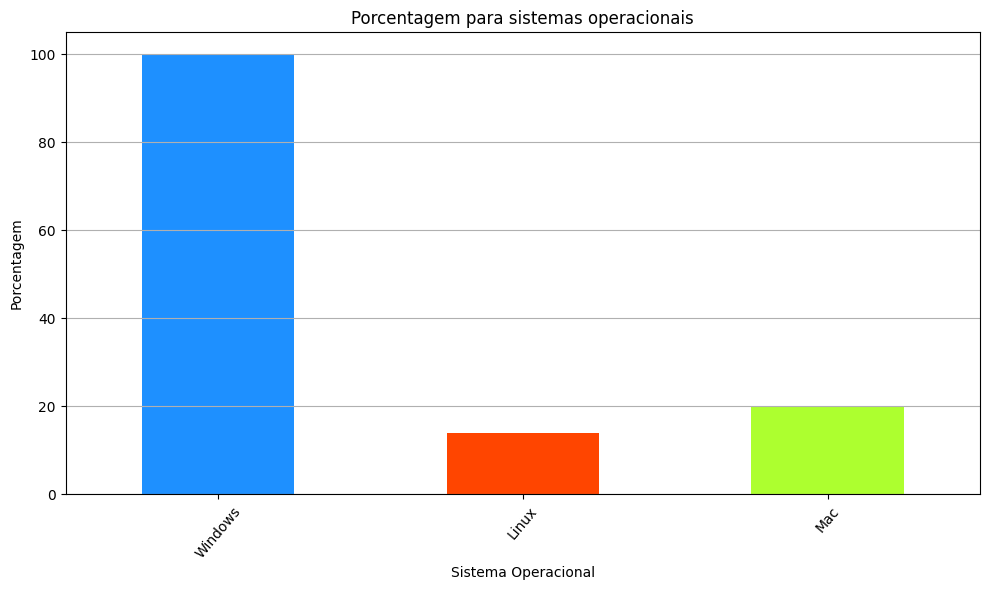

In [9]:
sist_op = tabela.copy()

# Faço a contagem para cada sistema operacional
contagem_sistemas = {
    'Windows': sist_op['Windows'].sum(),
    'Linux': sist_op['Linux'].sum(),
    'Mac': sist_op['Mac'].sum()
    }
# Crio uma 'tabela' com novas colunas para o gráfico
contagem_sistemas_df = pd.DataFrame(list(contagem_sistemas.items()),
                                    columns=['Sistema Operacional', 'Quantidade'])

# Procuro o total do jogos presentes
total_jogos = len(sist_op)
# Calculo da porcentagem
contagem_sistemas_df['Porcentagem'] = (contagem_sistemas_df['Quantidade'] / total_jogos) * 100

## Plot do grafico
cores = ['dodgerblue', 'orangered', 'greenyellow']
plt.figure(figsize=(10,6))
contagem_sistemas_df.set_index('Sistema Operacional')['Porcentagem'].plot(kind='bar', color=cores)
plt.title('Porcentagem para sistemas operacionais')
plt.ylabel('Porcentagem')
plt.xlabel('Sistema Operacional')
plt.xticks(rotation=50)
plt.grid(axis='y') # Melhorar visualização
plt.tight_layout() # Melhorar estética do gráfico
plt.show()

> Grafico 2


O grafico contém:
  *    Número total de jogos single-player do gênero Indie e estratégia lançados por ano entre 2010 e 2020;
  *    Tendência para cada gênero separadamente



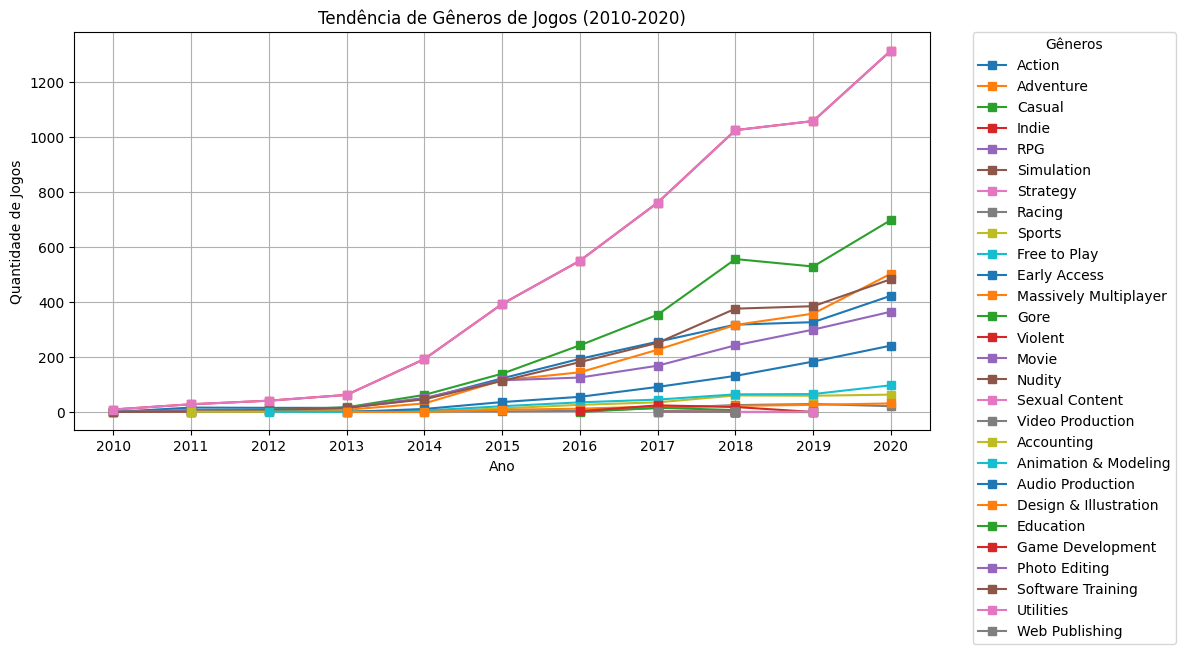

In [10]:
# Para não perder dados, cria uma cópia da tabela
tabela_copy = tabela.copy()
tabela_copy['Release date'] = pd.to_datetime(tabela_copy['Release date'], errors='coerce')
# Filtra tabelas por gêneros e categorias que contêm 'Indie'
filtro_grafico = tabela_copy[(tabela_copy['Genres'].str.contains('Indie', case=False, na=False) &
                      tabela_copy['Genres'].str.contains('Strategy', case=False, na=False)) &
                      (tabela_copy['Categories'].str.contains('Single-player', case=False, na=False)) &
                      (tabela_copy['Release date'].dt.year >= 2010) &
                      (tabela_copy['Release date'].dt.year <= 2020)]

# Remove entradas com valores ausentes em 'Genres'
indie = filtro_grafico.dropna(subset=['Genres'])

# Extraindo o ano
indie['Year'] = indie['Release date'].dt.year

# Separa os gêneros em linhas distintas
# Certifique-se de que cada gênero esteja separado por vírgulas na coluna 'Genres'
indie['Genres'] = indie['Genres'].str.split(',')
indie_genres = indie.explode('Genres')

# Remove espaços em branco que possam ter sido deixados
indie_genres['Genres'] = indie_genres['Genres'].str.strip()

# Agrupa por ano e gênero, contando a quantidade de jogos únicos para cada combinação
tendencia_genres = indie_genres.groupby(['Year', 'Genres']).size().reset_index(name='Count')

# Criando o gráfico
plt.figure(figsize=(12, 6))
for i, genero in enumerate(tendencia_genres['Genres'].unique()):
    subset = tendencia_genres[tendencia_genres['Genres'] == genero]
    plt.plot(subset['Year'], subset['Count'], marker='s', label=genero)
# Adicionando detalhes ao gráfico
plt.title('Tendência de Gêneros de Jogos (2010-2020)')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Jogos')
plt.xticks(tendencia_genres['Year'].unique())  # Exibir todos os anos
# Legenda ao lado do gráfico
plt.legend(title='Gêneros', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.grid()
plt.tight_layout()
plt.show()



> Grafico 3 - Vinculo com questão 5

Faça um grafico 'pizza' dos 5 jogos com maior 'Average playtime forever', com o nome dos jogos e quantidade de players a partir dos dados coletados.


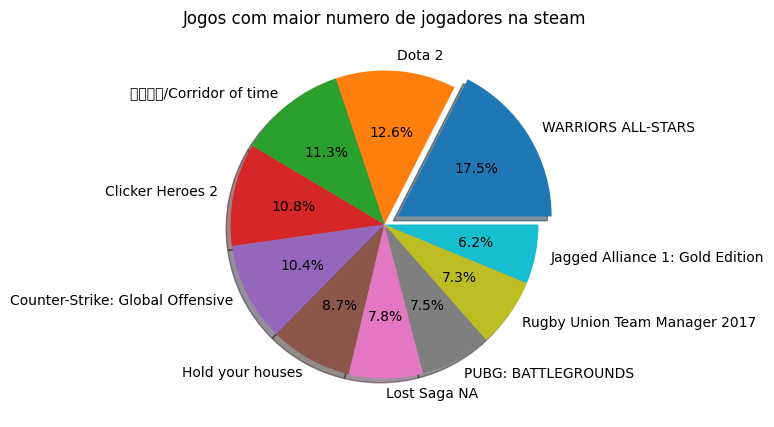

In [12]:
#Variaveis para escritas dentro do grafico
nome_jogos = max_players['Name']
jogadores_playtime = max_players['Average playtime forever']

explodes = [0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
plt.rcParams['font.family'] = 'DejaVu Sans' # Fonte definida para caso de escrita estrangeira
plt.figure(figsize=(10,5))
plt.pie(jogadores_playtime,# Tempo medio de jogo
        labels=nome_jogos, # Nome dos jogos
        autopct='%1.1f%%', # Formatação das porcentagens
        shadow=True,       # Adição de sombra
        explode=explodes)  # Adição de efeito na 'maior fatia'
plt.title('Jogos com maior numero de jogadores na steam')
plt.show()